In [59]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [62]:
data = pd.read_csv('pff_pi.csv', index_col=0)
data[data['SPEC'] != '-'].head(50)

,gamenum,Team,Opposing Team,Season,Week,Date,Time,H/A,W/L,PF,PA,OVR,OFF,PASS,PBLK,RECV,RUN,RBLK,DEF,RDEF,TACK,PRSH,COV,SPEC,OVR_opp,OFF_opp,PASS_opp,PBLK_opp,RECV_opp,RUN_opp,RBLK_opp,DEF_opp,RDEF_opp,TACK_opp,PRSH_opp,COV_opp,SPEC_opp
6,6,Denver Broncos,Los Angeles Rams,2006,1,2006-09-10,1:00pm,A,L,10,18,59.8,66.3,51.3,56.5,59.4,47.4,89.9,55.3,50.3,28.2,61.5,57.3,49.0,54.5,60.7,57.5,61.2,57.8,68.1,63.9,46.1,39.1,66.1,72.5,49.1,53.6
6,6,Los Angeles Rams,Denver Broncos,2006,1,2006-09-10,1:00pm,H,W,18,10,54.5,60.7,57.5,61.2,57.8,68.1,63.9,46.1,39.1,66.1,72.5,49.1,53.6,59.8,66.3,51.3,56.5,59.4,47.4,89.9,55.3,50.3,28.2,61.5,57.3,49.0
48,48,Minnesota Vikings,Buffalo Bills,2006,4,2006-10-01,1:00pm,A,L,12,17,59.1,55.5,62.8,68.8,48.6,54.0,67.1,64.8,77.7,64.4,62.7,53.7,43.3,68.7,64.6,68.3,78.8,72.4,49.6,53.8,70.8,55.6,78.1,61.7,76.4,72.2
48,48,Buffalo Bills,Minnesota Vikings,2006,4,2006-10-01,1:00pm,H,W,17,12,68.7,64.6,68.3,78.8,72.4,49.6,53.8,70.8,55.6,78.1,61.7,76.4,72.2,59.1,55.5,62.8,68.8,48.6,54.0,67.1,64.8,77.7,64.4,62.7,53.7,43.3
267,267,Detroit Lions,Oakland Raiders,2007,1,2007-09-09,4:15pm,A,W,36,21,74.8,80.3,78.2,85.6,70.6,61.4,88.5,62.6,29.4,45.6,82.9,72.2,43.3,64.1,71.4,70.3,64.3,60.5,64.3,92.6,52.0,42.7,76.0,57.0,58.9,72.2
267,267,Oakland Raiders,Detroit Lions,2007,1,2007-09-09,4:15pm,H,L,21,36,64.1,71.4,70.3,64.3,60.5,64.3,92.6,52.0,42.7,76.0,57.0,58.9,72.2,74.8,80.3,78.2,85.6,70.6,61.4,88.5,62.6,29.4,45.6,82.9,72.2,43.3
366,366,Houston Texans,Los Angeles Chargers,2007,8,2007-10-28,4:05pm,A,L,10,35,62.2,67.2,52.4,74.5,64.9,72.7,64.0,50.9,60.9,60.8,69.7,35.1,43.3,82.4,78.4,75.7,65.0,81.5,53.5,78.6,78.7,69.3,76.8,66.2,79.9,72.2
366,366,Los Angeles Chargers,Houston Texans,2007,8,2007-10-28,4:05pm,H,W,35,10,82.4,78.4,75.7,65.0,81.5,53.5,78.6,78.7,69.3,76.8,66.2,79.9,72.2,62.2,67.2,52.4,74.5,64.9,72.7,64.0,50.9,60.9,60.8,69.7,35.1,43.3
558,558,New York Jets,Los Angeles Chargers,2008,3,2008-09-22,8:30pm,A,L,29,48,59.5,57.7,47.4,82.2,55.8,39.2,83.6,63.1,70.0,74.2,52.3,56.5,60.5,69.9,70.8,69.8,82.1,72.9,51.8,65.7,66.1,59.4,68.7,54.6,70.3,35.0
558,558,Los Angeles Chargers,New York Jets,2008,3,2008-09-22,8:30pm,H,W,48,29,69.9,70.8,69.8,82.1,72.9,51.8,65.7,66.1,59.4,68.7,54.6,70.3,35.0,59.5,57.7,47.4,82.2,55.8,39.2,83.6,63.1,70.0,74.2,52.3,56.5,60.5


## This looks at the rolling average and stdev of whatever attribute you put in
Brief analysis shows that stats like OVR, DEF, OFF are fairly consistent with low standard deviations (4-12), while other attributes are very sporadic sometimes with rolling average stdev of 20+

Looking at OVR, there are some cases where you can see a team gain a lot of strength over the change of the season (large gradual spike), however this trend is only for certain teams 

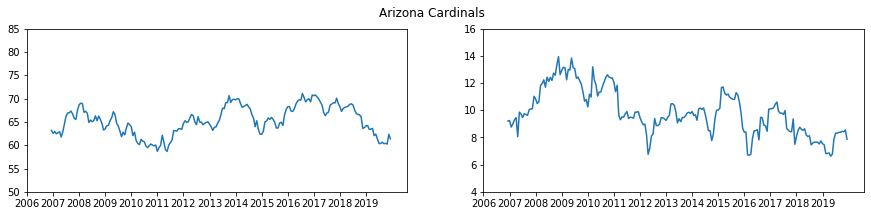

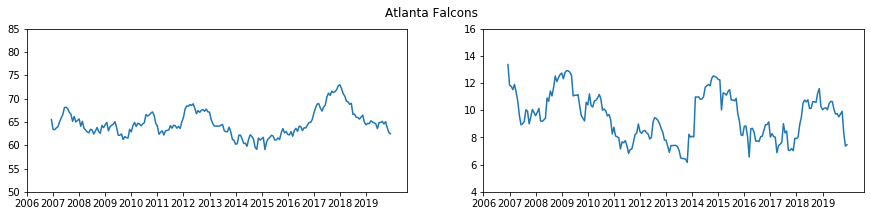

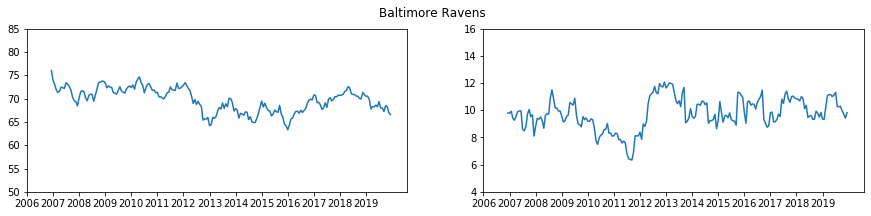

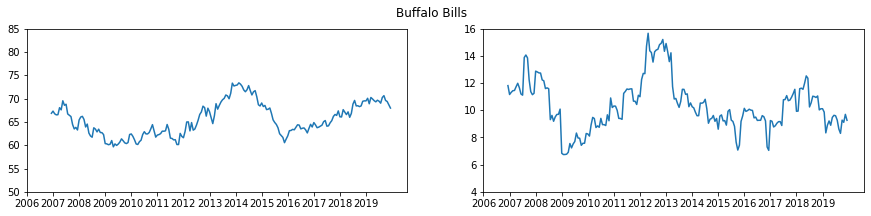

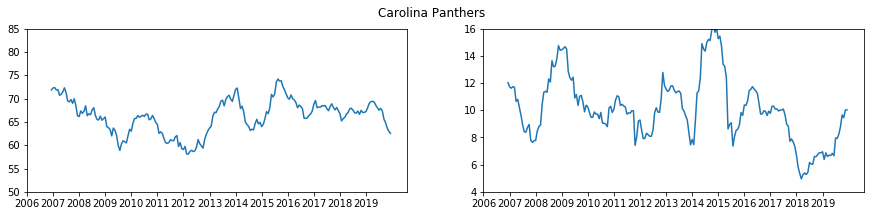

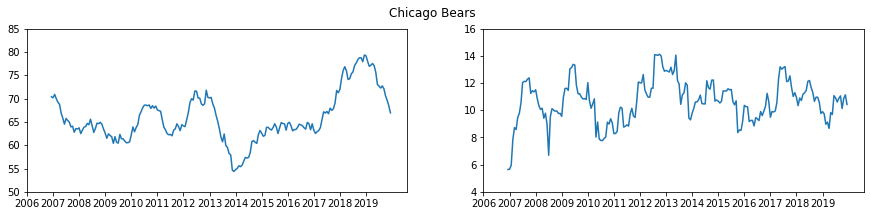

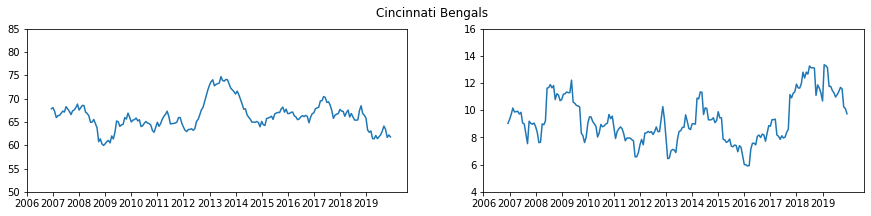

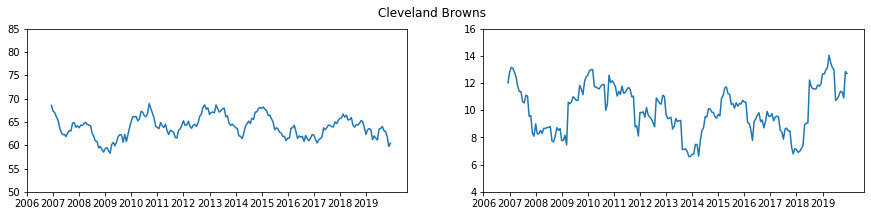

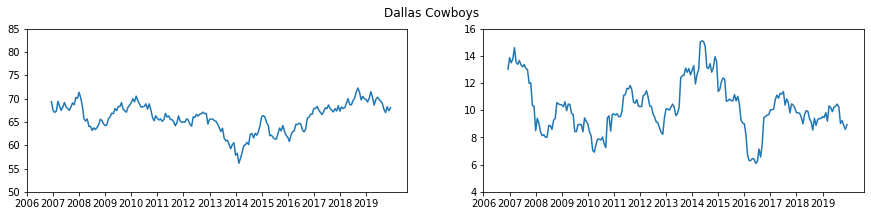

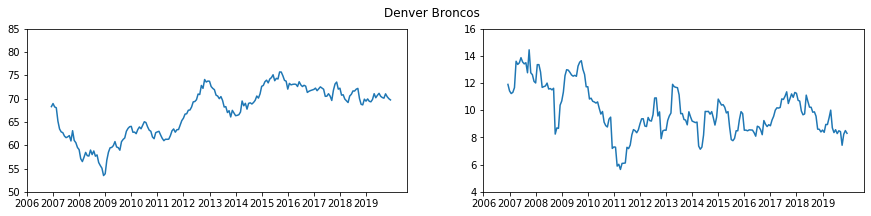

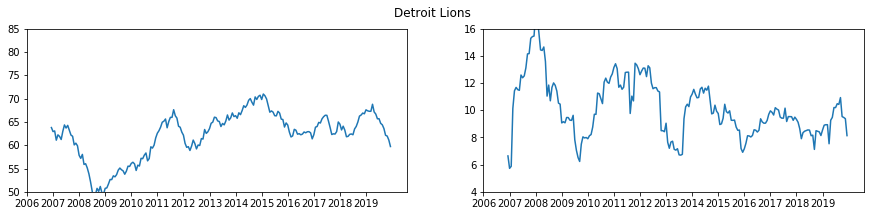

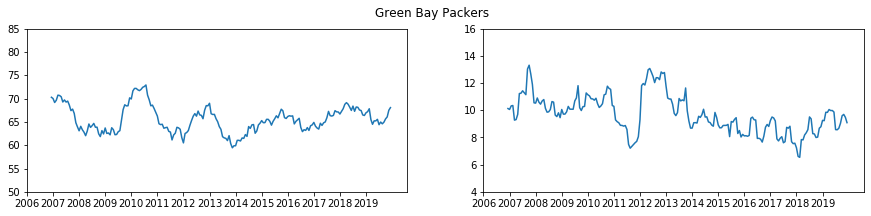

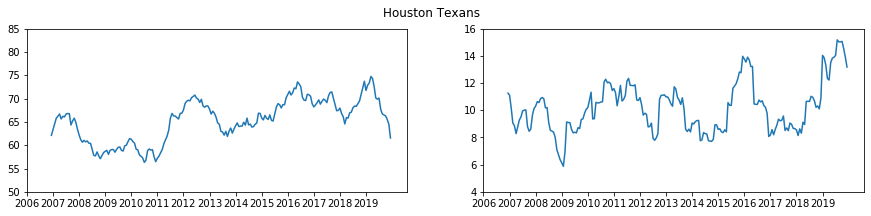

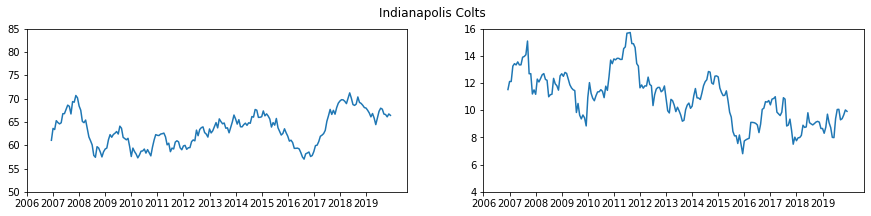

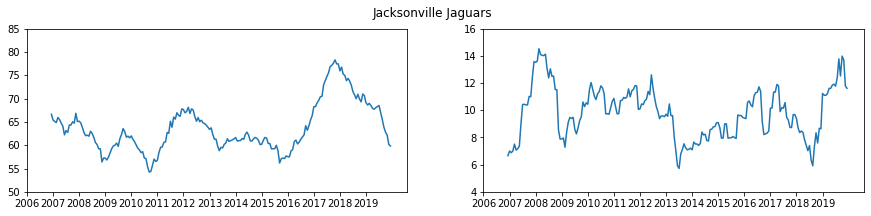

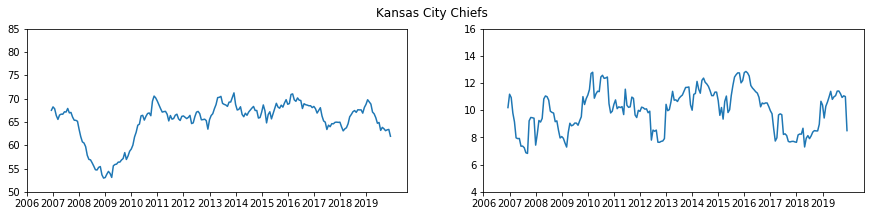

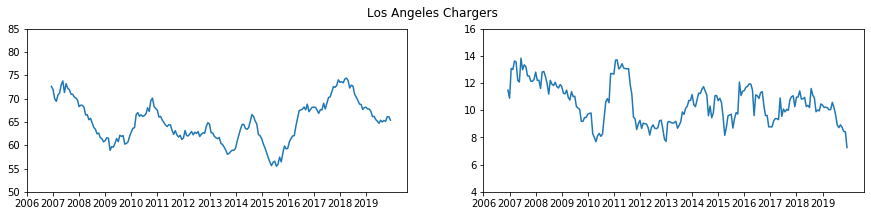

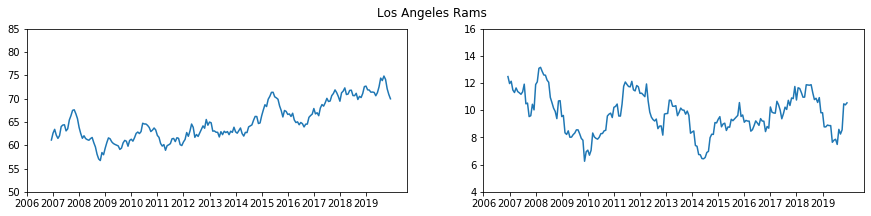

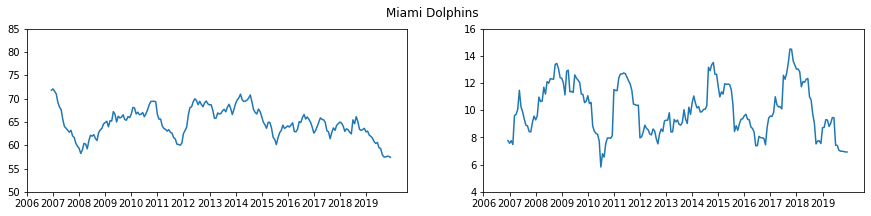

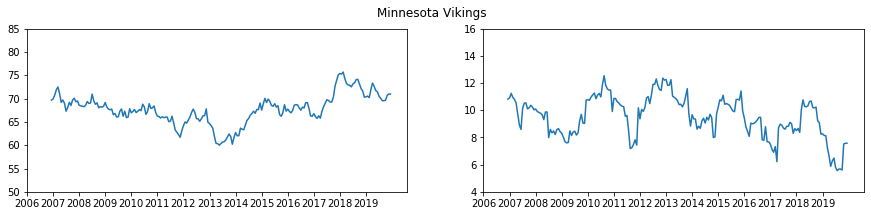

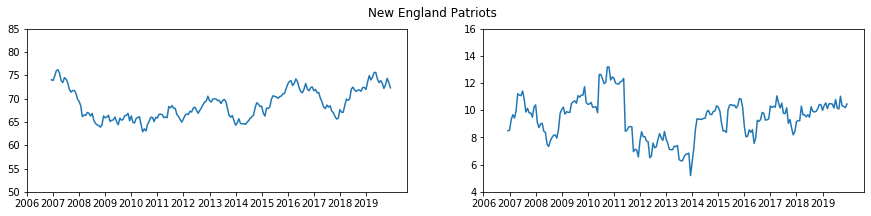

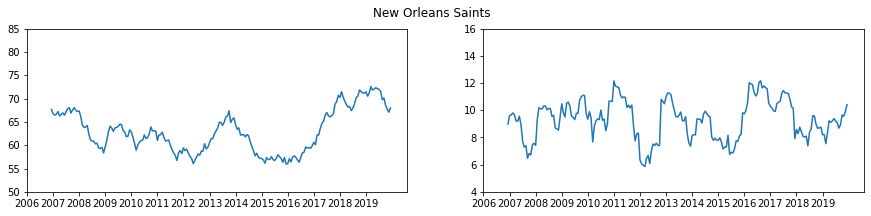

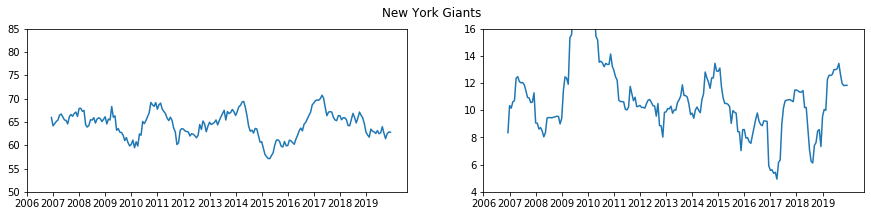

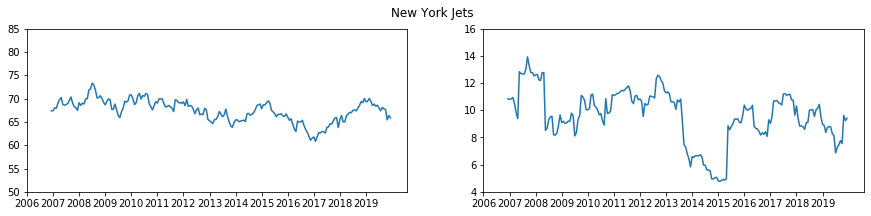

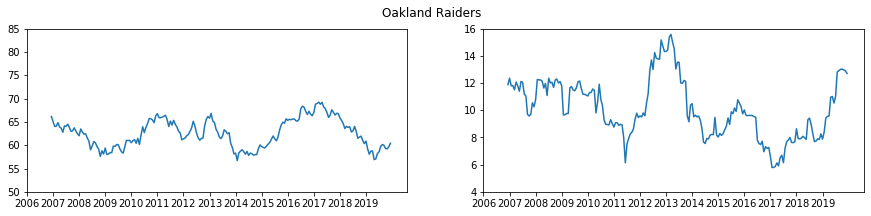

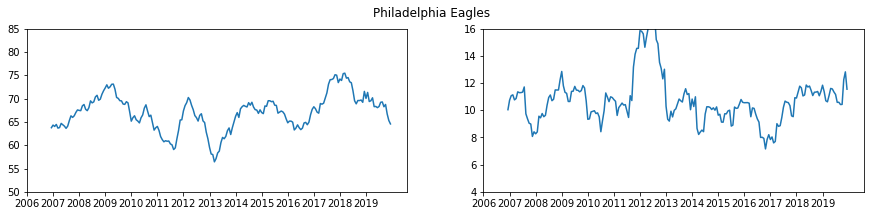

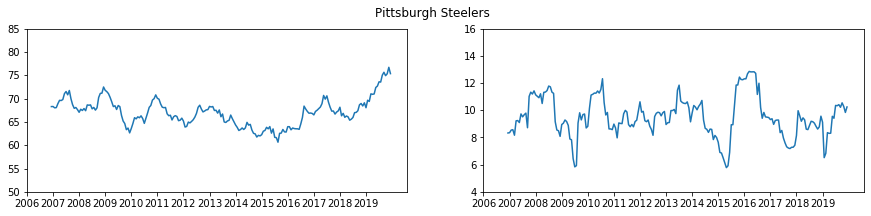

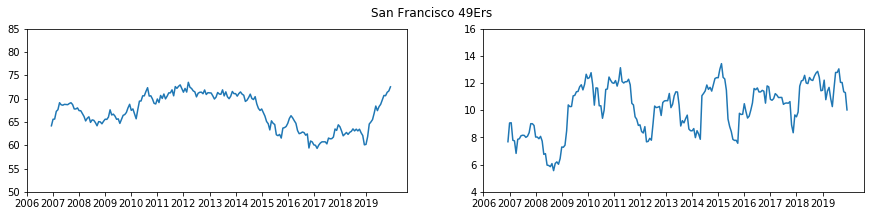

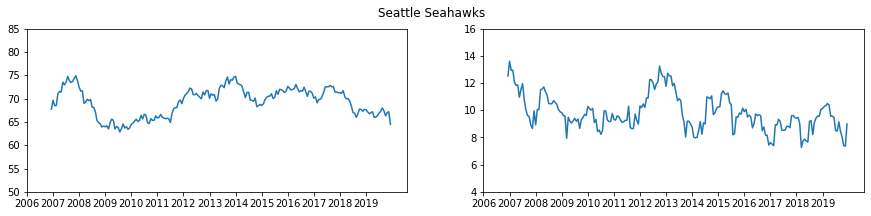

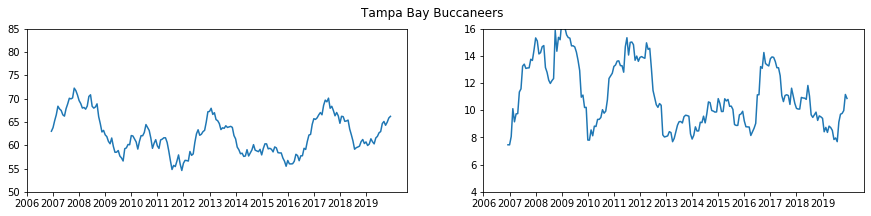

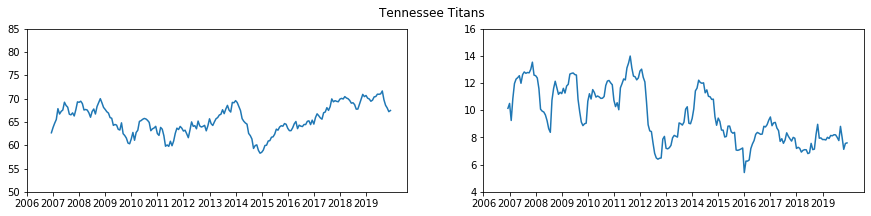

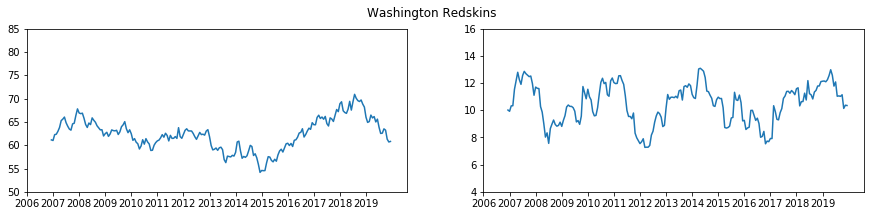

In [46]:
# enter attribute you want to analyze

attribute = 'DEF'

# iterates through every team
for team in data['Team'].sort_values().unique():

#     creates rolling average, based on value put in window
    moving_av16 = data[data['Team'] == team][attribute].rolling(window=16).mean()
    moving_stdev16 = data[data['Team'] == team][attribute].rolling(window=16).std()
    y = data[data['Team'] == team].Date

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))
    fig.suptitle(team)
    ax1.plot(y, moving_av16)
    ax1.set_xticks(np.arange(0, len(y), 16))
#     edit this range to view better
    ax1.set_ylim([50,85])
    ax1.set_xticklabels(['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])


    ax2.plot(y, moving_stdev16)
    ax2.set_xticks(np.arange(0, len(y), 16))
#     edit this range to view better
    ax2.set_ylim([4,16])
    ax2.set_xticklabels(['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])

    plt.show()

p test for normal distribution

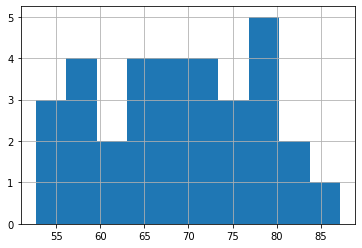

In [51]:
attribute = 'DEF'



team_df = data[data['Team'] == 'Dallas Cowboys'].tail(32)

team_df[attribute].hist()

In [45]:
axes[0][0].plot()